In [1]:
import sys
sys.path.insert(0,'python')
from classification import *
from readSent import *
import pylab as plt
import numpy as np
from fastRWpkl import *
import scipy.stats
import matplotlib.gridspec as gridspec
from scipy.stats import gaussian_kde
from scipy import optimize
from scipy import interpolate
%matplotlib inline 
from smoothn import *

In [2]:
bands = readfile([1, 2, 3, 4, 8 , 11, 12], 'data/50SMG20165100', )

data/50SMG20165100auxiliaryECMWFT
data/50SMG20165100metadata.xml


In [3]:
a = ['B01', 'B02', 'B03', 'B04', 'B08', 'B11', 'B12']

In [4]:
sent = []
for i,j in enumerate(sorted(a)):
    sent.append(bands[j])

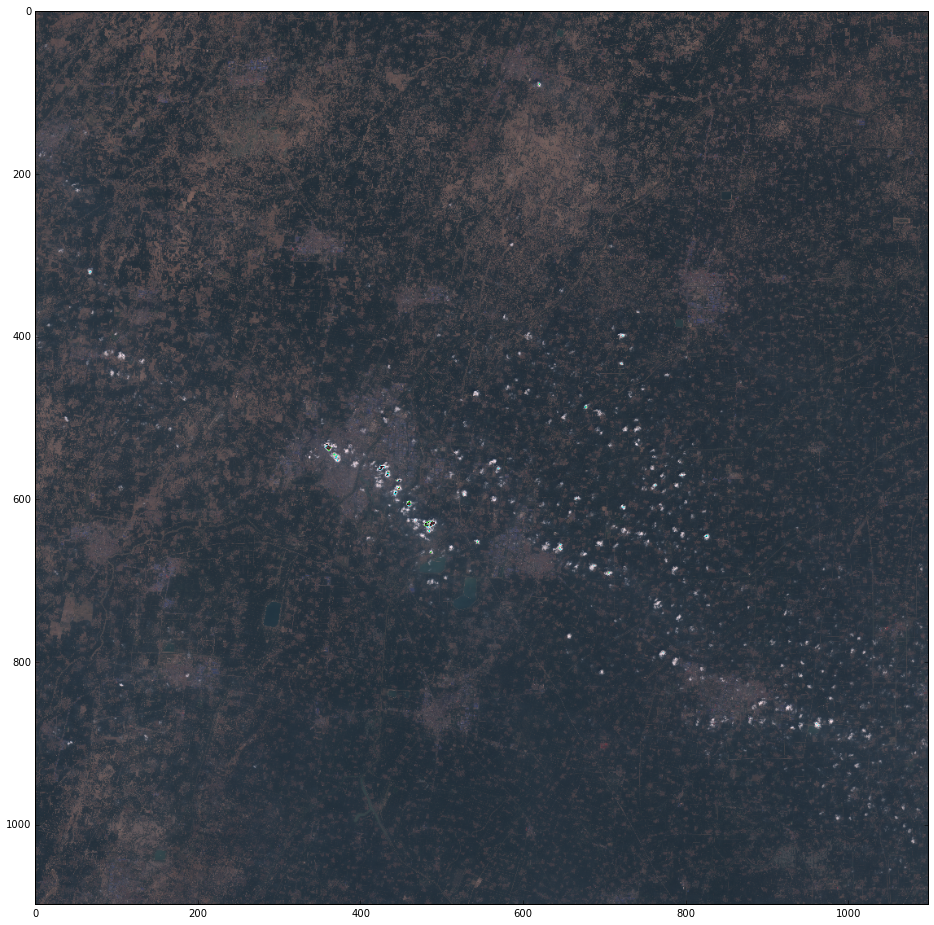

In [46]:
rgb = np.zeros((1098, 1098,3))
rgb[:,:,0] = sent[3][::10,::10]
rgb[:,:,1] = sent[2][::10,::10]
rgb[:,:,2] = sent[1][::10,::10]
plt.figure(figsize=(16,16))
plt.imshow(rgb*1.8)

In [5]:
ndvi = (sent[4]-sent[3])/(sent[4]+sent[3])

In [6]:
cm = parallel_rw_pkl(None, '0510diacm', 'r')

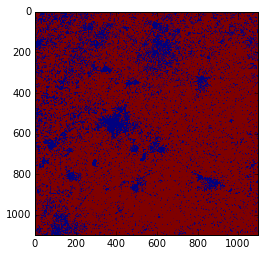

In [51]:
plt.imshow(ndvi[::10,::10]>0.3) # areas with NDVI over 0.3, bascially vegs

In [55]:
veg = (ndvi>0.3)*(~cm) # remove cloud pixels, though highly unlikely cloud have a high NDVI

In [5]:
veg = parallel_rw_pkl(None, '50SMGvegs', 'r')

#### Apply the linear regression 
between the red and blue, red and 2200 nm, red and 1600 nm, blue and 1600nm, red and 2200 nm.
['B01', 'B02', 'B03', 'B04', 'B08', 'B11', 'B12']

In [58]:
rr,cc = np.where(veg)

In [65]:
x,y = sent[1][rr,cc], sent[3][rr,cc]
r = scipy.stats.linregress(y,x)
print r

LinregressResult(slope=0.46160172690185725, intercept=0.092382864307545776, rvalue=0.81969067895609493, pvalue=0.0, stderr=3.3093289233442152e-05)


In [68]:
ind = np.random.choice(np.arange(len(rr)), 1000)

LinregressResult(slope=0.48519756482582033, intercept=0.090386648465543479, rvalue=0.81000200748130324, pvalue=9.0201392597785747e-231, stderr=0.011186857197033344)


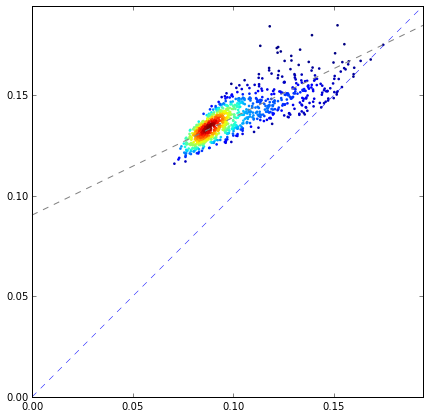

In [72]:
y,x = sent[1][rr[ind],cc[ind]], sent[3][rr[ind],cc[ind]]
nanm = (np.isnan(x))|(np.isnan(y))
y,x = x[~nanm], y[~nanm]
dif = x-y
sigma = np.nanstd(dif)
mean = np.nanmean(dif)

Thr_sigma = 3.*sigma
inliers = (dif < mean+3*sigma)&(dif > mean-3*sigma)

x = x[inliers]
y = y[inliers]
maxval = np.nanmax(np.nanmax(y),np.nanmax(x))
xy = np.vstack([y,x])
z = gaussian_kde(xy)(xy)

fit = np.polyfit(y,x,1)
fit_fn = np.poly1d(fit)

fig, ax = plt.subplots(figsize = (7,7))
ax.scatter(y, x, c=z, s=7, edgecolor='')
plt.plot([0,1],[0.,1], '--',linewidth=0.5)
plt.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
plt.xlim(0, maxval)
plt.ylim(0, maxval)
r = scipy.stats.linregress(y,x)
print r

In [74]:
def ScaleExtent(data, shape): # used for unifine different array,

    re = int(shape[0]/(data.shape[0]))

    a = np.repeat(np.repeat(data, re, axis = 1), re, axis =0)
    
    if (re*(data.shape[0])-shape[0]) != 0:
        extended = np.zeros(shape)
        extended[:re*(data.shape[0]),:re*(data.shape[0])] = a
        extended[re*(data.shape[0]):,re*(data.shape[0]):] = a[re*(data.shape[0])-shape[0]:, re*(data.shape[0])-shape[0]]
        return extended
    else:
        return a

In [76]:
b11 = ScaleExtent(sent[5], (10980,10980))
b12 = ScaleExtent(sent[6], (10980,10980))

LinregressResult(slope=0.40174754160954568, intercept=0.035978866614692878, rvalue=0.83882078246967617, pvalue=1.1095336418228878e-263, stderr=0.008286872786972958)


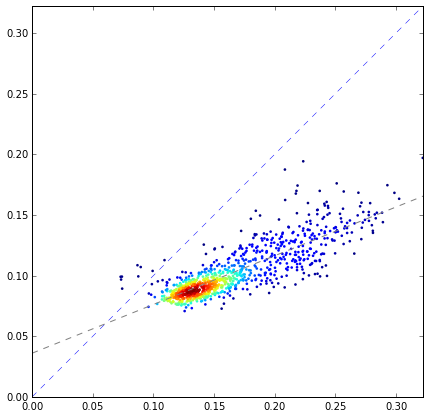

In [78]:
x,y = b11[rr[ind],cc[ind]], sent[3][rr[ind],cc[ind]]
nanm = (np.isnan(x))|(np.isnan(y))
y,x = x[~nanm], y[~nanm]
dif = x-y
sigma = np.nanstd(dif)
mean = np.nanmean(dif)

Thr_sigma = 3.*sigma
inliers = (dif < mean+3*sigma)&(dif > mean-3*sigma)

x = x[inliers]
y = y[inliers]
maxval = np.nanmax(np.nanmax(y),np.nanmax(x))
xy = np.vstack([y,x])
z = gaussian_kde(xy)(xy)

fit = np.polyfit(y,x,1)
fit_fn = np.poly1d(fit)

fig, ax = plt.subplots(figsize = (7,7))
ax.scatter(y, x, c=z, s=7, edgecolor='')
plt.plot([0,1],[0.,1], '--',linewidth=0.5)
plt.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
plt.xlim(0, maxval)
plt.ylim(0, maxval)
r = scipy.stats.linregress(y,x)
print r

LinregressResult(slope=0.40968894773652342, intercept=0.061201808590933764, rvalue=0.85508611095908571, pvalue=4.2902143402058008e-284, stderr=0.0079031998877527841)


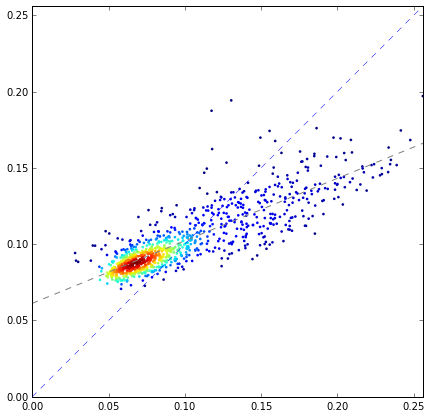

In [79]:
x,y = b12[rr[ind],cc[ind]], sent[3][rr[ind],cc[ind]]
nanm = (np.isnan(x))|(np.isnan(y))
y,x = x[~nanm], y[~nanm]
dif = x-y
sigma = np.nanstd(dif)
mean = np.nanmean(dif)

Thr_sigma = 3.*sigma
inliers = (dif < mean+3*sigma)&(dif > mean-3*sigma)

x = x[inliers]
y = y[inliers]
maxval = np.nanmax(np.nanmax(y),np.nanmax(x))
xy = np.vstack([y,x])
z = gaussian_kde(xy)(xy)

fit = np.polyfit(y,x,1)
fit_fn = np.poly1d(fit)

fig, ax = plt.subplots(figsize = (7,7))
ax.scatter(y, x, c=z, s=7, edgecolor='')
plt.plot([0,1],[0.,1], '--',linewidth=0.5)
plt.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
plt.xlim(0, maxval)
plt.ylim(0, maxval)
r = scipy.stats.linregress(y,x)
print r

#### Removal of haze

Tasseled cap method is used

In [7]:
rr,cc = np.where(veg)

In [8]:
tc = 0.846*sent[1][rr,cc]-9.464*sent[3][rr,cc]

In [11]:
cl = tc<tc.mean()

In [14]:
clpix = [rr[cl], cc[cl]]

In [25]:
r = scipy.stats.linregress(sent[3][clpix[0], clpix[1]],sent[1][clpix[0], clpix[1]])
print r

LinregressResult(slope=0.44084640239977768, intercept=0.094675412818063853, rvalue=0.63884320928737015, pvalue=0.0, stderr=8.8803331602846863e-05)


In [147]:
def cost(p):
    p1, p2  = p
    tc = p1*sent[1][rr,cc]-p2*sent[3][rr,cc]
    cl = tc<tc.mean()
    clpix = [rr[cl], cc[cl]]
    r = scipy.stats.linregress(sent[3][clpix[0], clpix[1]],sent[1][clpix[0], clpix[1]])
    print p, r
    return 1-r.rvalue

In [152]:
p = np.array([0.846, -9.464])
psolve = optimize.fmin(cost, p, full_output=1)

LinregressResult(slope=0.63056021583777522, intercept=0.077434905495869399, rvalue=0.68262629314011591, pvalue=0.0, stderr=8.795542542160225e-05)
LinregressResult(slope=0.62957748525898871, intercept=0.077518560839807224, rvalue=0.68198538009816578, pvalue=0.0, stderr=8.7979515777765881e-05)
LinregressResult(slope=0.63151262160383448, intercept=0.077353831742410589, rvalue=0.68323632829376335, pvalue=0.0, stderr=8.7934931144054496e-05)
LinregressResult(slope=0.63249164919345646, intercept=0.077270484007447252, rvalue=0.68388025023244103, pvalue=0.0, stderr=8.7908962542884535e-05)
LinregressResult(slope=0.63386785997081674, intercept=0.0771533194944449, rvalue=0.68477809926081712, pvalue=0.0, stderr=8.7874098002443948e-05)
LinregressResult(slope=0.63455870156324423, intercept=0.077094509072805073, rvalue=0.6852068071330637, pvalue=0.0, stderr=8.7862365687778012e-05)
LinregressResult(slope=0.63636010915078012, intercept=0.076941133718183452, rvalue=0.68640104421998327, pvalue=0.0, stderr

In [153]:
psolve

(array([-74.99856519, -54.11266347]), 0.066915819739392091, 86, 181, 0)

So the best results for sentinel 2 image with a good correlation is -75 and -54

In [19]:
tc = -75.*sent[1][rr,cc]-54.11*sent[3][rr,cc]
cl = tc<tc.mean()
clpix = [rr[cl], cc[cl]]

/data/store01/data_dirs/students/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 95010312 but corresponding boolean dimension is 10000
  from ipykernel import kernelapp as app
/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:324: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  res = np.fmax.reduce(a, axis=axis, out=out, keepdims=keepdims)
/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


LinregressResult(slope=2.1748386361586762, intercept=-0.18554739962274117, rvalue=0.93352835123415512, pvalue=0.0, stderr=0.013021495998651596)


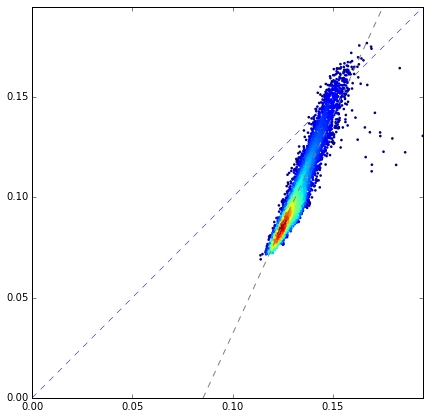

In [8]:
randcl = np.random.choice(cl, 10000)
clpix = [rr[randcl], cc[randcl]]
x,y = sent[3][clpix[0], clpix[1]],sent[1][clpix[0], clpix[1]]

dif = x-y
sigma = np.nanstd(dif)
mean = np.nanmean(dif)

Thr_sigma = 3.*sigma
inliers = (dif < mean+3*sigma)&(dif > mean-3*sigma)

x = x[inliers]
y = y[inliers]
maxval = np.nanmax(np.nanmax(y),np.nanmax(x))
xy = np.vstack([y,x])
z = gaussian_kde(xy)(xy)

fit = np.polyfit(y,x,1)
fit_fn = np.poly1d(fit)

fig, ax = plt.subplots(figsize = (7,7))
ax.scatter(y, x, c=z, s=7, edgecolor='')
plt.plot([0,1],[0.,1], '--',linewidth=0.5)
plt.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
plt.xlim(0, maxval)
plt.ylim(0, maxval)
r = scipy.stats.linregress(y,x)
print r

In [157]:
randcl = np.random.choice(cl, 100000)

LinregressResult(slope=2.1550003117703072, intercept=-0.18225202466827795, rvalue=0.9321709352991856, pvalue=0.0, stderr=0.0041910344165497415)


/data/store01/data_dirs/students/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 95010312 but corresponding boolean dimension is 100000
  if __name__ == '__main__':


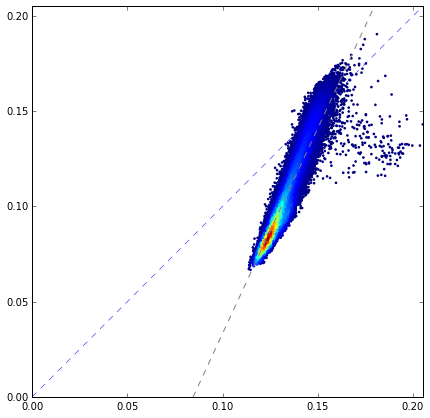

In [385]:
clpix = [rr[randcl], cc[randcl]]
x,y = sent[3][clpix[0], clpix[1]],sent[1][clpix[0], clpix[1]]

dif = x-y
sigma = np.nanstd(dif)
mean = np.nanmean(dif)

Thr_sigma = 3.*sigma
inliers = (dif < mean+3*sigma)&(dif > mean-3*sigma)

x = x[inliers]
y = y[inliers]
maxval = np.nanmax(np.nanmax(y),np.nanmax(x))
xy = np.vstack([y,x])
z = gaussian_kde(xy)(xy)

fit = np.polyfit(y,x,1)
fit_fn = np.poly1d(fit)

fig, ax = plt.subplots(figsize = (7,7))
ax.scatter(y, x, c=z, s=7, edgecolor='')
plt.plot([0,1],[0.,1], '--',linewidth=0.5)
plt.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
plt.xlim(0, maxval)
plt.ylim(0, maxval)
r = scipy.stats.linregress(y,x)
print r

As we can see that more samples will include more ouliers, so I used the intercept value of 2.2 for the regression angle.

In [9]:
arc = np.arctan(2.2) # rad

In [10]:
arc

1.1441688336680205

In [11]:
np.sin(arc)

0.91036647746260468

In [13]:
hzpix = [rr[~cl], cc[~cl]]

In [15]:
clpix = [rr[cl], cc[cl]]

In [16]:
hot = np.sin(arc)*sent[1][hzpix[0], hzpix[1]] - np.cos(arc)*sent[3][hzpix[0], hzpix[1]]

In [20]:
clhot = np.sin(arc)*sent[1][clpix[0], clpix[1]] - np.cos(arc)*sent[3][clpix[0], clpix[1]]

0.0858196377752


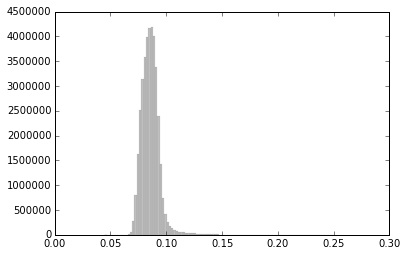

In [21]:
hist = plt.hist(clhot, 100, color='gray', alpha=0.5, linewidth=0.1)
print (clhot).mean()

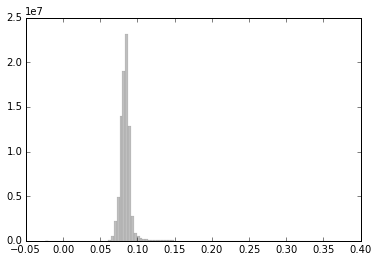

In [19]:
hist = plt.hist(hot, 100, color='gray', alpha=0.5, linewidth=0.1)

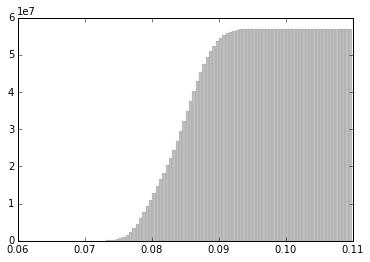

In [18]:
hist = plt.hist(hot, 100, cumulative=True,  color='gray', alpha=0.5, linewidth=0.1)

Most of the clear pixels have a hot value of 0.078, so the starting delta value for haze pixels is from 0.078 and added every 0.001 as the interval.

In [23]:
ints = [0.078+i*0.001 for i in range(35)]

In [24]:
hzsen = sent[1][hzpix[0], hzpix[1]]

In [25]:
lbs = np.array([np.histogram(hzsen[hot>i])[1][0] for i in ints])

In [26]:
lb = lbs[lbs>0]

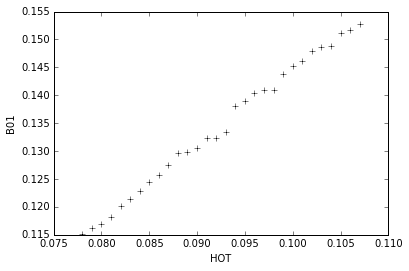

In [27]:
plt.plot(np.array(ints)[lbs>0], lb, '+k')
plt.xlabel('HOT')
plt.ylabel('B01')

In [28]:
adjust = lb-lb[0]
adjust

array([ 0.    ,  0.0011,  0.0019,  0.0031,  0.005 ,  0.0063,  0.0078,
        0.0094,  0.0107,  0.0124,  0.0145,  0.0148,  0.0155,  0.0172,
        0.0172,  0.0184,  0.0229,  0.0238,  0.0253,  0.0259,  0.0259,
        0.0288,  0.0301,  0.0311,  0.0329,  0.0335,  0.0337,  0.0361,
        0.0366,  0.0377])

In [29]:
print ints

[0.078, 0.079, 0.08, 0.081, 0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09, 0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099, 0.1, 0.101, 0.10200000000000001, 0.10300000000000001, 0.10400000000000001, 0.105, 0.106, 0.107, 0.108, 0.109, 0.11, 0.111, 0.112]


In [30]:
ints = np.array(ints)[lbs>0]
adjs = []
for j, i in enumerate(ints):
    if j<len(ints)-1:
        x= np.where((hot>i)&(hot<ints[j+1]))
        adjs.append([x,adjust[j]])
    else:
        x = np.where((hot>i))
        adjs.append([x,adjust[j]])                       

In [29]:
adjs

[[(array([     261,      326,      329, ..., 57016766, 57016767, 57016777]),),
  0.0],
 [(array([     328,      356,      358, ..., 57016762, 57016774, 57016972]),),
  0.0011000000000000038],
 [(array([      17,       97,      132, ..., 57016917, 57016929, 57016960]),),
  0.0019000000000000128],
 [(array([       0,        4,        6, ..., 57017003, 57017123, 57017255]),),
  0.0031000000000000055],
 [(array([       7,       10,       11, ..., 57017192, 57017201, 57018024]),),
  0.0050000000000000044],
 [(array([       2,        3,        5, ..., 57017637, 57017957, 57018036]),),
  0.0063],
 [(array([       1,        9,       15, ..., 57018193, 57018198, 57018400]),),
  0.0078000000000000014],
 [(array([      19,       20,      116, ..., 57018702, 57018708, 57018718]),),
  0.0094000000000000056],
 [(array([     139,      148,      153, ..., 57018717, 57018719, 57018731]),),
  0.010700000000000001],
 [(array([    8075,    13174,    82565, ..., 57018737, 57018739, 57018742]),),
  0.012400

In [31]:
rr[~cl], len(cc[~cl])

(array([    0,     0,     0, ..., 10979, 10979, 10979]), 57018753)

In [32]:
x,y = rr[~cl], cc[~cl]
adjimg = [[x[i[0]], y[i[0]], i[1]] for i in adjs]

In [33]:
hzadj = np.zeros_like(sent[1])
hzadj[:] = np.nan
for i in adjimg:
    hzadj[i[0], i[1]] = i[2]

<matplotlib.colorbar.Colorbar instance at 0x7fa8a56dddd0>

/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


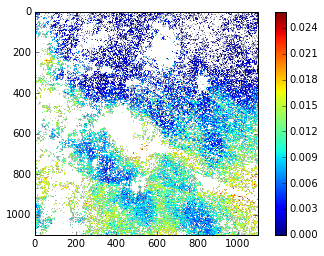

In [34]:
plt.imshow(hzadj[::10,::10])
plt.colorbar()

In [35]:
hzadj[rr[cl], cc[cl]] = 0

<matplotlib.colorbar.Colorbar instance at 0x7fa573f062d8>

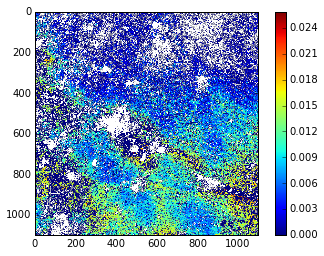

In [36]:
plt.imshow(hzadj[::10,::10])
plt.colorbar()

In [37]:
parallel_rw_pkl(hzadj, 'hzadj', 'w')

In [4]:
np.isnan(hzadj).sum()/(10980.*10980.)

0.24829480492765452

In [64]:
from smoothn import *

In [66]:
smhz = smoothn(hzadj, isrobust=True)

./python/smoothn.py:256: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  Lambda = Lambda + (cos(pi*(arange(1,sizy[i]+1) - 1.)/sizy[i]).reshape(siz0))


<matplotlib.colorbar.Colorbar instance at 0x7f537557e050>

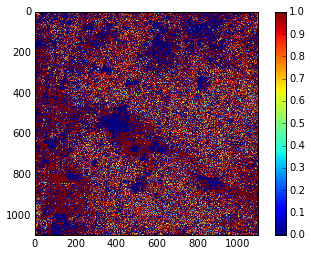

In [73]:
plt.imshow(smhz[3][::10,::10])
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7f5343f2e1b8>

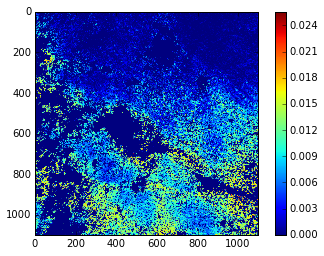

In [74]:
plt.imshow(smhz[0][::10,::10], vmin = 0)
plt.colorbar()

In [3]:
hzadj = parallel_rw_pkl(None, 'hzadj', 'r')

In [7]:
smhz = smoothn(hzadj)

python/smoothn.py:256: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  Lambda = Lambda + (cos(pi*(arange(1,sizy[i]+1) - 1.)/sizy[i]).reshape(siz0))


In [9]:
smhz

(array([[ -1.49862641e-05,   3.62689399e-03,   7.33052729e-03, ...,
          -1.16954504e-16,  -2.01972240e-16,  -3.03701773e-16],
        [  4.35197149e-04,   6.70194671e-03,   6.48212021e-03, ...,
           3.54256570e-17,   9.61136896e-17,   1.92868098e-17],
        [  2.87149711e-04,   5.95873735e-03,   5.52472816e-03, ...,
           4.31380025e-16,   1.78373957e-15,   2.49622773e-15],
        ..., 
        [  1.10137865e-02,   1.25725680e-02,   1.42497112e-02, ...,
          -7.00919433e-05,  -1.64858255e-05,   1.24557826e-06],
        [  1.12119580e-02,   1.37143820e-02,   1.44116742e-02, ...,
          -1.05233421e-05,   4.57307097e-07,   1.22493034e-06],
        [  1.39378716e-02,   1.15569244e-02,   1.42442184e-02, ...,
           6.82272664e-07,   8.68474596e-07,   1.66550010e-07]]),
 0.15855169345307432,
 True,
 array([[ 1.,  1.,  1., ...,  0.,  0.,  0.],
        [ 1.,  1.,  1., ...,  0.,  0.,  0.],
        [ 1.,  1.,  1., ...,  1.,  0.,  0.],
        ..., 
        [ 1., 

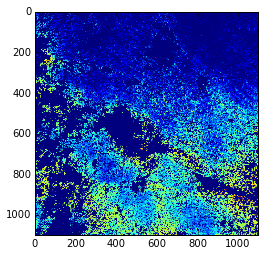

In [11]:
plt.imshow(smhz[0][::10,::10], vmin=0)

In [4]:
hx,hy = np.where(~np.isnan(hzadj))
gridx, gridy = np.mgrid[0:10980, 0:10980]
points = np.array([hx,hy]).T
values = hzadj[hx,hy]
cubhz = interpolate.griddata(points, values, (gridx, gridy),method='linear')

In [21]:
defalt = 0
deltas = []
hzsen = sent[1][hzpix[0], hzpix[1]]

In [410]:
deltas = []
for i in np.where(hist[1]>0.0781590792784)[0]:
    if i<100:
        intval = (hot>hist[1][i])&(hot<hist[1][i+1])
        lenbin = intval.sum()
        if lenbin>50:
            binval = hzsen[intval]
            hotint = hot[intval]
            sp = lenbin*0.02
            spval = np.sort(hotint)[int(sp)]
            a = np.where(hotint<=spval)
            #bmean = hzsen[hot == hist[1][i]].mean()
            bmean = binval.mean()
            lowmean = binval[a].mean()
            delta = bmean - lowmean
            deltas.append([hist[1][i], delta])
            defalt = delta
        else:
            deltas.append([hist[1][i], defalt])

In [349]:
np.sort(hot[intval])[4304]

-0.046720947085346243

In [353]:
hzsen[intval][hot[intval]<=-0.046720947085346243].mean()

0.13354888492417485

In [354]:
hzsen[intval].mean()

0.13341938200942177

In [355]:
0.13341938200942177 - 0.13354888492417485

-0.0001295029147530824

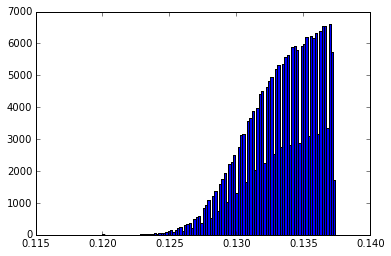

In [327]:
intval = (hot>hist[1][40])&(hot<hist[1][41])
a = plt.hist(sent[1][hzpix[0], hzpix[1]][intval], bins = 100)

In [261]:
(hot[intval]).mean()

-0.026237620737544862

In [262]:
gap = len(np.sort(hot[intval]))*0.02

In [263]:
hot[intval][:int(gap)].mean()

-0.026235174591574123

In [265]:
delta = -0.026237620737544862- (-0.026235174591574123)
delta

-2.446145970738667e-06

-0.047282525032


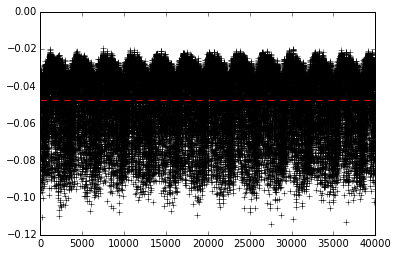

In [165]:
plt.plot(clhot, 'k+')
plt.plot([0,len(clhot)],[clhot.mean(),clhot.mean()], 'r--')
plt.fill_between([0, len(clhot)], clhot.mean()-clhot.std(),clhot.mean()+clhot.std(), color= 'gray', alpha=0.8)
plt.xlim(0, len(clhot))
print clhot.mean()

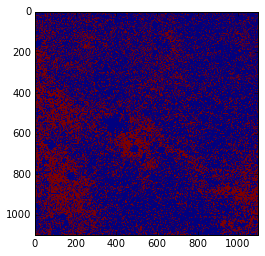

In [168]:
ts = np.zeros((10980,10980))
ts[rr[cl], cc[cl]] = 1
plt.imshow(ts[::10,::10])